In [58]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk import tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score

In [4]:
dataset = pd.read_csv('IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
dataset.dtypes

review       object
sentiment    object
dtype: object

In [7]:
dataset.shape

(50000, 2)

In [9]:
dataset['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

### Counts and Length
- Character count
- Word count
- Mean word length
- Mean sentence length

In [10]:
# character count
dataset['Length'] = dataset['review'].str.len()
dataset.head()

,review,sentiment,Length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [11]:
# word count
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [12]:
dataset['Word_count'] = dataset['review'].apply(word_count)
dataset.head()

,review,sentiment,Length,Word_count
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230


In [14]:
# Mean word length: average length of words
dataset['mean_word_length'] = dataset['review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
dataset.head()

,review,sentiment,Length,Word_count,mean_word_length
0,One of the other reviewers has mentioned that ...,positive,1761,307,4.739414
1,A wonderful little production. <br /><br />The...,positive,998,162,5.166667
2,I thought this was a wonderful way to spend ti...,positive,926,166,4.584337
3,Basically there's a family where a little boy ...,negative,748,138,4.427536
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,4.730435


In [20]:
# Mean sentence length: average length of the sentences in the review
dataset['mean_sen_length'] = dataset['review'].map(lambda rev: np.mean([len(sen) for sen in tokenize.sent_tokenize(rev)]))
dataset.head()

,review,sentiment,Length,Word_count,mean_word_length,mean_sen_length
0,One of the other reviewers has mentioned that ...,positive,1761,307,4.739414,175.200000
1,A wonderful little production. <br /><br />The...,positive,998,162,5.166667,141.714286
2,I thought this was a wonderful way to spend ti...,positive,926,166,4.584337,230.750000
3,Basically there's a family where a little boy ...,negative,748,138,4.427536,123.833333
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,4.730435,145.444444


In [36]:
def visualize(col):
    print()
    plt.subplot(1, 2, 1)
    sns.boxplot(data = dataset, x = col, hue = "sentiment")

    plt.subplot(1, 2, 2)
    sns.kdeplot(data = dataset, x = col, hue = 'sentiment')
    plt.legend(dataset['sentiment'].unique())   
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

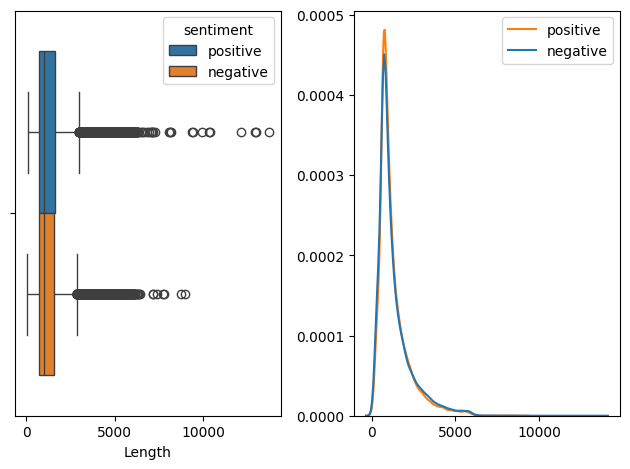

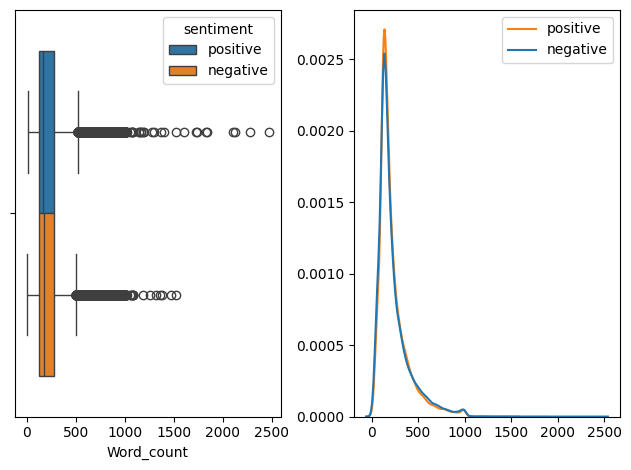

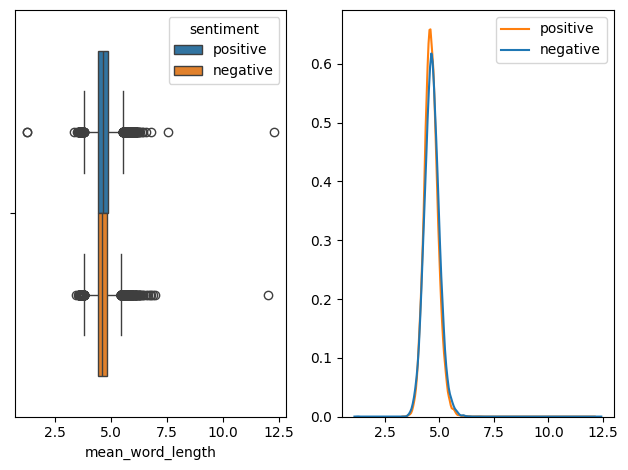

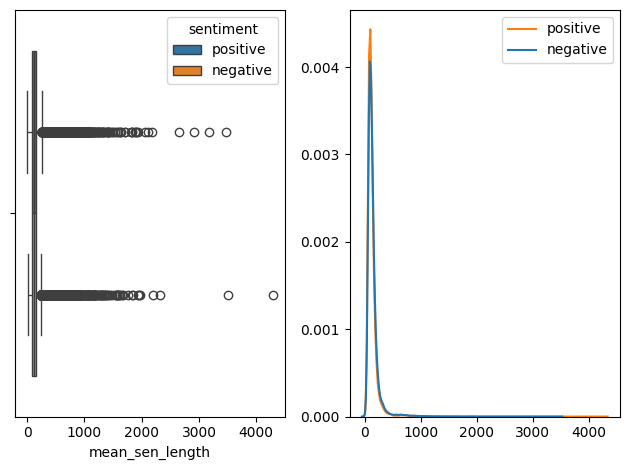

In [37]:
features = dataset.columns.tolist()[2:]
for feature in features:
    visualize(feature)

### Term Frequency Analysis

In [41]:
dataset = dataset.drop(features, axis=1)
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [42]:
# check missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


No missing data, so next we preprocess the data.
- Lowercase
- Remove punctuations
- Stopword removal

In [44]:
def clean(review):
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review

In [48]:
dataset['review'] = dataset['review'].apply(clean)
dataset.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [49]:
# Time taken ~ 50 mins. Exporting the preprocessed dataset
dataset.to_csv('imdb-cleaned.csv')

In [51]:
# Using TextBlob polarity for Sentiment Analysis
def pred_sentiment(polarity):
    if polarity > 0:
        return "positive"
    else:
        return "negative"

In [56]:
dataset['predictions'] = dataset['review'].map(lambda rev: pred_sentiment(TextBlob(rev).sentiment.polarity))

In [57]:
dataset.head()

,review,sentiment,predictions
0,one reviewers mentioned watching 1 oz episode ...,positive,positive
1,wonderful little production br br filming tech...,positive,positive
2,thought wonderful way spend time hot summer we...,positive,positive
3,basically theres family little boy jake thinks...,negative,positive
4,petter matteis love time money visually stunni...,positive,positive


In [59]:
acc = accuracy_score(dataset['predictions'].tolist(), dataset['sentiment'].tolist()) * 100
print("Accuracy: {}".format(acc))

Accuracy: 70.088


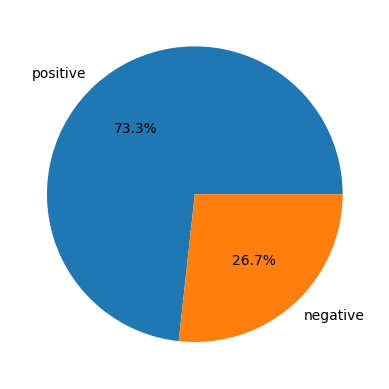

In [64]:
plt.pie(dataset['predictions'].value_counts(), labels = dataset['sentiment'].unique().tolist(), autopct = '%1.1f%%')
plt.show()